In [79]:
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math
%matplotlib notebook

In [80]:
def Initialize(n,m):
    x,time = np.meshgrid(np.linspace(0,2,n),np.linspace(0,1,m))
    V = np.zeros((n,m))
    return x,time,V

In [81]:
def boundary_condition(xlen,V):
    bound_x = np.linspace(0,2,n+1)
    for i in range(xlen):
        V[0][i] = max(math.exp(bound_x[i]),0)
    return V

In [82]:
def boundary_condition1(xlen,ylen,V):
    bound_x = np.linspace(0,2,n+1)
    for i in range(xlen):
        for j in range(ylen):
            V[i][j] = max(math.exp(bound_x[j]),0)
    return V

In [83]:
def FDM(x,time,V,dt,dx,k):
    a = 0
    for t in range(1,m):
        for i in range(1,n-1):
            V[i][t] = V[i-1][t-1] - dt*((1/dx)*(V[i][t-1] - V[i-1][t-1]) + ((k-1)/dx)* (V[i][t-1] - V[i-1][t-1]) - 2*k*V[i-1][t-1])
            print(-1*dt*((1/dx)*(V[i][t-1] - V[i-1][t-1]) + ((k-1)/dx)* (V[i][t-1] - V[i-1][t-1]) - 2*k*V[i-1][t-1]))
            #if V[i][t] < a:
                #print(t,i,V[i][t])
            a = V[i][t]
    return V

In [84]:
def FDM1(x,time,V,dt,dx,k):
    a = 0
    for t in range(1,m):
        for i in range(1,n):
            V[t][i] = V[t-1][i] - dt*((1/dx)*(V[t-1][i] - V[t-1][i-1]) + ((k-1)/dx)* (V[t-1][i] - V[t-1][i-1]) - k*V[t-1][i])
            if V[t][i] > a:
                a = V[t][i]
    print(a)
    return V

In [85]:
def Visualize(x,time,V):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(0,0)
    surf = ax.plot_surface(x,time, V, cmap=cm.coolwarm)  
    plt.xlabel("x")
    plt.ylabel("time")
    

6.025064949734119


<IPython.core.display.Javascript object>


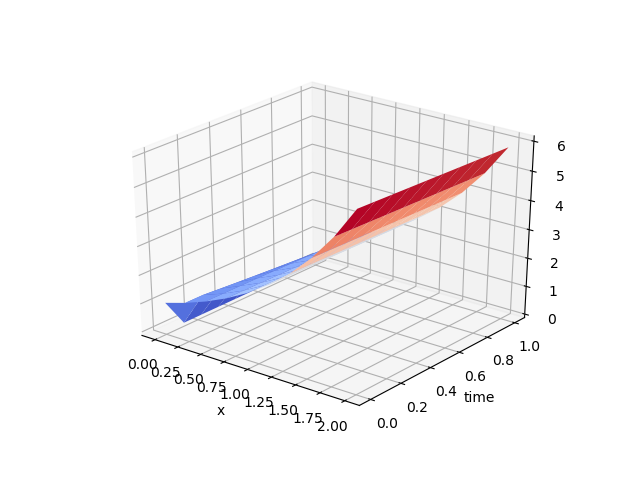

In [87]:
if __name__ == "__main__":
    n,m = 10,10
    x,time,V = Initialize(n,m)
    V = boundary_condition(n,V)
    dt = 0.001
    dx = 0.1
    k = 5
    V = FDM1(x,time,V,dt,dx,k)
    #x = x[1:]
    #time = time[1:]
    #V = V[1:]
    #print(V)
    Visualize(x,time,V)
    
    

In [41]:
def FDM1(x,time,V,dt,dx,k):
    a = 0
    for t in range(1,m):
        for i in range(1,n-1):
            V[t][i] = V[t-1][i] + dt*((1/dx)*(V[t-1][i] - V[t-1][i-1]) + ((k-1)/dx)* (V[t-1][i] - V[t-1][i-1]) - k*V[t-1][i])
    return V